In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

/var/folders/nk/5zcc814x561cbxxgrncjyscw0000gn/T/ipykernel_75072/3989159341.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = data.groupby('text_type').mean()


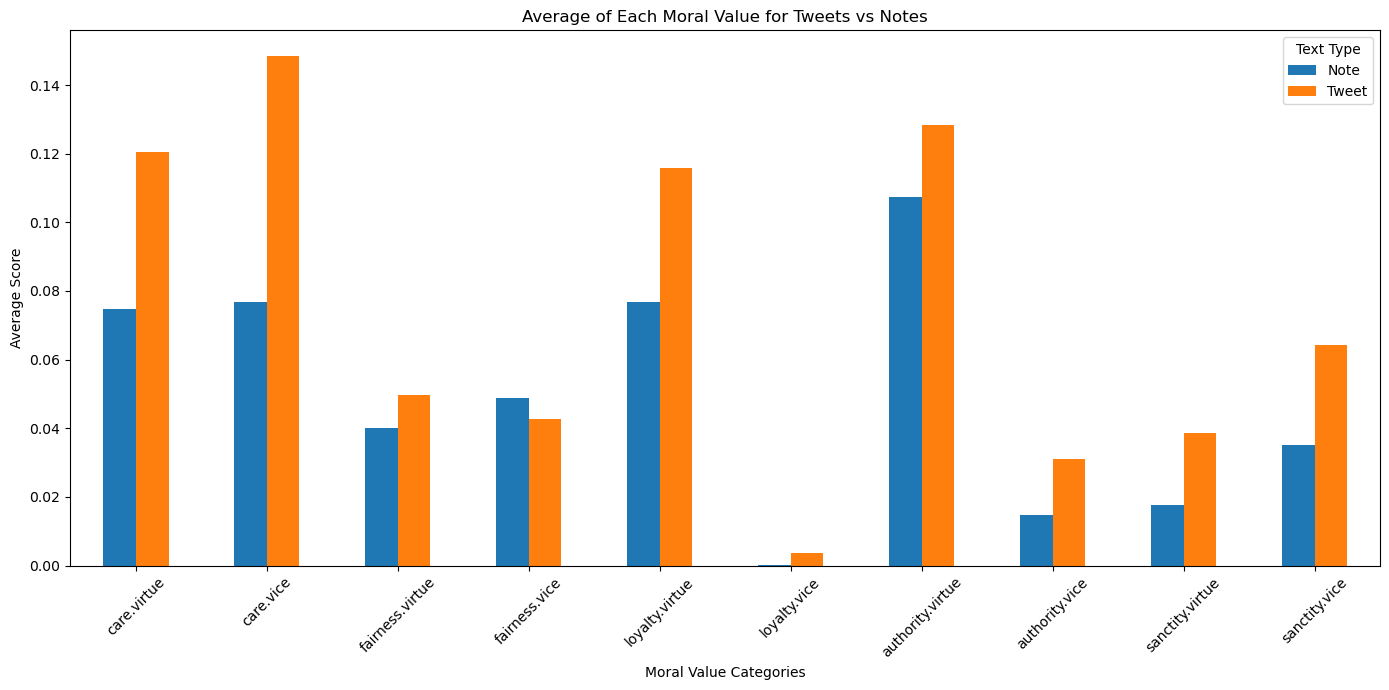

In [7]:
# Load your data
data = pd.read_csv('/Users/andrew/Desktop/community_notes_3/Notes and Posts Result/notes_and_tweets_m.csv') #Replace with path to nots_and_tweets_m.csv

# Calculate the mean of each moral value category for tweets and notes
mean_values = data.groupby('text_type').mean()

# Plotting the results
fig, ax = plt.subplots(figsize=(14, 7))
mean_values.T.plot(kind='bar', ax=ax)
ax.set_title('Average of Each Moral Value for Tweets vs Notes')
ax.set_ylabel('Average Score')
ax.set_xlabel('Moral Value Categories')
ax.legend(title='Text Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
#ata into tweets and notes based on 'text_type'
tweets = data[data['text_type'] == 'Tweet']
notes = data[data['text_type'] == 'Note']  # Assuming 'Note' is the label for notes

# Initialize a dictionary to store the p-values and significance for each moral value category
results = []

# Loop through each column of moral values (excluding the first two columns)
for column in data.columns[2:]:
    # Perform t-test between tweets and notes
    stat, p = ttest_ind(tweets[column], notes[column], equal_var=False, nan_policy='omit')
    # Determine if the result is statistically significant
    is_significant = 'Yes' if p < 0.05 else 'No'
    # Store the results in the list
    results.append({'Moral Value': column, 'P-Value': p, 'Significant': is_significant})

# Convert the list to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

        Moral Value       P-Value Significant
0       care.virtue  6.430456e-07         Yes
1         care.vice  1.437774e-10         Yes
2   fairness.virtue  9.693119e-02          No
3     fairness.vice  3.146414e-01          No
4    loyalty.virtue  3.194882e-05         Yes
5      loyalty.vice  2.987119e-02         Yes
6  authority.virtue  5.977514e-02          No
7    authority.vice  3.296721e-04         Yes
8   sanctity.virtue  3.467397e-05         Yes
9     sanctity.vice  9.399074e-06         Yes


In [9]:
#Bonferroni correction

# Initialize a dictionary to store the p-values and significance for each moral value category
bon_results = []

# Count the number of tests (number of moral value categories)
num_tests = len(data.columns[2:])

# Loop through each column of moral values (excluding the first two columns)
for column in data.columns[2:]:
    # Perform t-test between tweets and notes
    stat, p = ttest_ind(tweets[column], notes[column], equal_var=False, nan_policy='omit')
    # Apply Bonferroni correction
    corrected_alpha = 0.05 / num_tests
    # Determine if the result is statistically significant after correction
    is_significant = 'Yes' if p < corrected_alpha else 'No'
    # Store the results in the list
    bon_results.append({'Moral Value': column, 'P-Value': p, 'Corrected Significance': is_significant})

# Convert the list to a DataFrame for better visualization
bon_results_df = pd.DataFrame(bon_results)

# Display the results
print(bon_results_df)

        Moral Value       P-Value Corrected Significance
0       care.virtue  6.430456e-07                    Yes
1         care.vice  1.437774e-10                    Yes
2   fairness.virtue  9.693119e-02                     No
3     fairness.vice  3.146414e-01                     No
4    loyalty.virtue  3.194882e-05                    Yes
5      loyalty.vice  2.987119e-02                     No
6  authority.virtue  5.977514e-02                     No
7    authority.vice  3.296721e-04                    Yes
8   sanctity.virtue  3.467397e-05                    Yes
9     sanctity.vice  9.399074e-06                    Yes


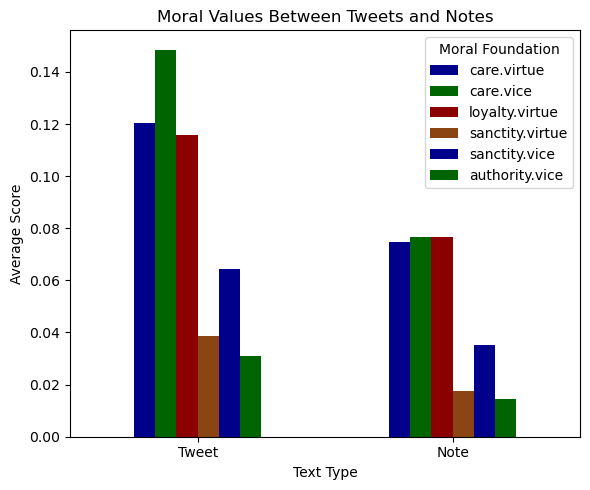

In [10]:
selected_values = ['care.virtue', 'care.vice', 'loyalty.virtue', 'sanctity.virtue', 'sanctity.vice', 'authority.vice']

# Initialize a dictionary to store the mean values for significant differences
significant_means = {}

# Perform t-tests and filter for significance
for value in selected_values:
    stat, p = ttest_ind(tweets[value], notes[value], equal_var=False, nan_policy='omit')
    if p < 0.05:
        # Calculate means for significant values only
        tweet_mean = tweets[value].mean()
        note_mean = notes[value].mean()
        significant_means[value] = {'Tweet': tweet_mean, 'Note': note_mean}

# Convert the dictionary to DataFrame
significant_means_df = pd.DataFrame(significant_means)

# Plotting the results
fig, ax = plt.subplots(figsize=(6, 5))
significant_means_df.plot(kind='bar', ax=ax, color=['darkblue', 'darkgreen', 'darkred', 'saddlebrown'])
ax.set_title('Moral Values Between Tweets and Notes')
ax.set_ylabel('Average Score')
ax.set_xlabel('Text Type')
ax.legend(title='Moral Foundation')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
